# Praca domowa 7

## Pakiety

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

## Wczytanie danych

In [2]:
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')
test = pd.read_csv('test.csv')

Zapoznajmy się wstępnie z danymi.

In [3]:
train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.300000,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.520000,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.600000,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.010000,0.57,1.64,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.920000,0.89,2.15,590
91,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.570000,1.19,3.13,463
92,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
93,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530


In [4]:
test

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
5,0,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
6,0,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
7,0,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
8,0,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
9,0,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625


Wszystkie kolumny są numeryczne, dodatkowo w zbiorze  testowym została dodana kolumna, która etykietuje czy obserwacja jest outlierem.

Wyodrębnijmy sobie kolumnę z etykietami.

In [5]:
labels = test["class"]
test = test.drop(["class"], axis = 1)

In [6]:
pd.concat([test, train, val]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 16
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       129 non-null    float64
 1   Malic acid                    129 non-null    float64
 2   Ash                           129 non-null    float64
 3   Alcalinity of ash             129 non-null    float64
 4   Magnesium                     129 non-null    int64  
 5   Total phenols                 129 non-null    float64
 6   Flavanoids                    129 non-null    float64
 7   Nonflavanoid phenols          129 non-null    float64
 8   Proanthocyanins               129 non-null    float64
 9   Color intensity               129 non-null    float64
 10  Hue                           129 non-null    float64
 11  OD280/OD315 of diluted wines  129 non-null    float64
 12  Proline                       129 non-null    int64  
dtypes: flo

Jeszcze raz możemy się upewnić, że wszystkie kolumny są numeryczne, co więcej nie występują braki danych.

## Modelowanie

Dane zostały przygotowane. 

Ponieważ naszym celem jest zbadanie, czy model GMM może być używany do detekcji outlierów, dobierzmy najpierw właściwą dla niego liczbę klastrów i typ kowariancji na zbiorze treningowym, który jak wiemy nie ma outlierów.

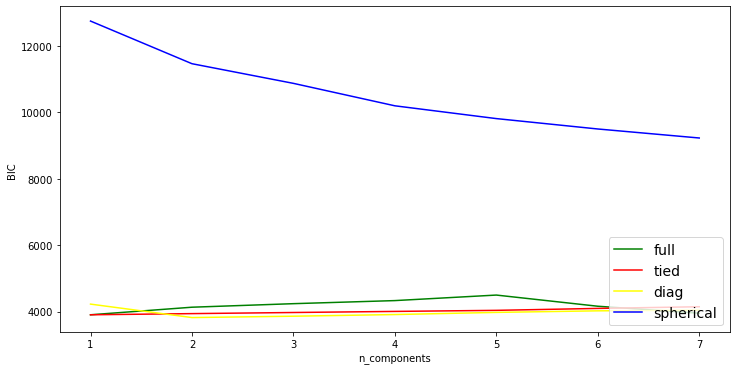

In [7]:
plt.figure(figsize=(12, 6))

for cov_type, col in zip(['full', 'tied', 'diag', 'spherical'],
                        ['green', 'red', 'yellow', 'blue']):
    score = []
    
    for n in range(1, 8):

        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=17)
        gmm.fit(train)
        score.append(gmm.bic(train))
        
    plt.plot(range(1, 8), score, color=col, label=cov_type)
    
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.legend(loc='lower right', fontsize=14)
plt.show()

Chciałem użyć silhouette_score, jednak tam nie zbadamy jak zachowuje się model przy tylko jednym komponencie. A wydaje się, że dla tego zbioru z taką liczbą danych jeden komponent może być stosowny. Z tego powodu zbadajmy zachowanie metryki BIC. Wykresy wskazują jej najniższą wartość dla 1 komponentu przy kowariancji 'tied'.

Z dokumentacji możemy się dowiedzieć, że atrybut score_samples zwraca logarytm prawdopodobieństwa przynależności do klastra. Możemy to wykorzystać do wyznaczenia punktu odcięcia - punkty z bardzo niskim prawdopodobiństwem przynależności będziemy uznawać za outliery.

In [8]:
gmm = GaussianMixture(n_components=1, covariance_type='tied', random_state=17)
gmm.fit(train)

GaussianMixture(covariance_type='tied', random_state=17)

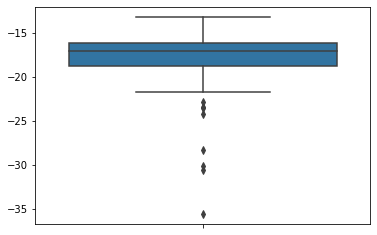

-35.632145622230574


In [9]:
train_prob = gmm.score_samples(train)
sns.boxplot(y = train_prob)
plt.show()
print(min(train_prob))

Powyżej zwizualizowaliśmy otrzymane prawd. dla zbioru treningowego. Wiemy, że nie ma tutaj outlierów. Porównajmy to ze zbiorem walidacyjnym.

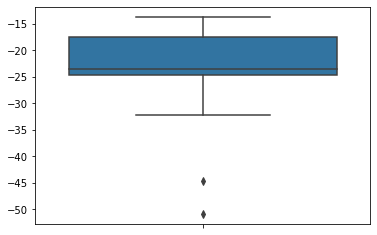

In [10]:
val_prob = gmm.score_samples(val)
sns.boxplot(y = val_prob)
plt.show()

Widząc wyniki otrzymane tutaj i za poziom odcięcia przyjmując wartość minimalna ze zbioru treningowego (-35), 2 najbardziej odstające obserwacje uznalibyśmy za outliery. Wydaje się to całkiem sensowne, więc zbadajmy w końcu nasz model na zbiorze testowym.

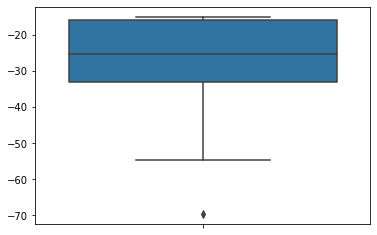

In [11]:
test_prob = gmm.score_samples(test)
sns.boxplot(y = test_prob)
plt.show()

In [12]:
y_predicted = test_prob < min(train_prob)
y_predicted = y_predicted.astype(int)

In [13]:
results = pd.DataFrame(
    [("precision", precision_score(labels, y_predicted)),
    ("recall", recall_score(labels, y_predicted)),
    ("F1-score", f1_score(labels, y_predicted))],
    columns=["metric", "score"]
)
results

,metric,score
0,precision,1.00
1,recall,0.60
2,F1-score,0.75


Wyszedł nam trochę niski recall, może jednak wartość -35 jest zbyt niska. Widzieliśmy, że odstawała ona od pozostałych. Zobaczmy czy przez podniesienie jej zredukujemy liczbę fałszywie negatywnych zaklasyfikowań. (Przesuwając tę garnicę, bardziej rygorystycznie będziemy oceniać obserwację jako outlier.)

In [14]:
y_predicted = test_prob < -30
y_predicted = y_predicted.astype(int)

In [15]:
results = pd.DataFrame(
    [("precision", precision_score(labels, y_predicted)),
    ("recall", recall_score(labels, y_predicted)),
    ("F1-score", f1_score(labels, y_predicted))],
    columns=["metric", "score"]
)
results

,metric,score
0,precision,0.833333
1,recall,1.000000
2,F1-score,0.909091


Teraz trochę się pogorszyła precyzja, ale ten model wydaje się lepszy do tego zadania.

Cały ten eksperyment pokazał, że model GMM faktycznie może okazać się użyteczny przy detekcji outlierów.